### Surfs Up!

Katelyn Burke - Advanced Data Storage and Retrieval Assignment

In [1]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from flask import Flask, jsonify

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

### Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc
from sqlalchemy import inspect
from sqlalchemy import func

In [5]:
# Create engine
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [6]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Exploratory Climate Analysis


#### Precipitation Analysis

In [10]:
inspector = inspect(engine)

In [11]:
print(inspector.get_table_names())

['measurement', 'station']


In [12]:
print(inspector.get_columns("measurement"))

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [13]:
# Load CSVs into a dataframe
# Hawaii Precipitation Measurements 
measurements_csv_path = "Resources/hawaii_measurements.csv"

measurements_df = pd.read_csv(measurements_csv_path)
measurements_df.head()

,station,date,prcp,tobs
0,USC00519397,1/1/10,0.08,65
1,USC00519397,1/2/10,0.00,63
2,USC00519397,1/3/10,0.00,74
3,USC00519397,1/4/10,0.00,76
4,USC00519397,1/6/10,NaN,73


In [14]:
# Hawaii Stations
stations_csv_path = "Resources/hawaii_stations.csv"

stations_df = pd.read_csv(stations_csv_path)
stations_df.head()

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [15]:
# Calculate the date 1 year ago from the last data point in the database
#last date = 2017-08-23, go back 1 year = 2016-08-23

last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_data_point

('2017-08-23')

In [16]:
# 1 year prior to 2017-08-23
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_ago)

2016-08-23


In [17]:
#session.query(Measurement.prcp).group_by(Measurement.date).all()

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the date and precipitation scores
# prcp = precipitation

hawaii_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()

hawaii_precip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [19]:
# Load the results into a Pandas dataframe
hawaii_precip_df = pd.DataFrame(hawaii_precip)
hawaii_precip_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [20]:
# Set the index to the date column
# Sort the dataframe by date
hawaii_precip_df2 = hawaii_precip_df.set_index('date')
hawaii_precip_df2.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


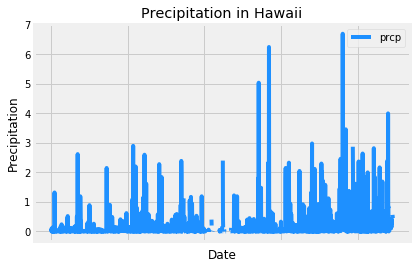

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = hawaii_precip_df2.plot(kind ='line', sort_columns=True, use_index=True, legend=True, grid=True, color='dodgerblue')
plt.ylabel("Precipitation")
plt.xlabel("Date")
plt.title("Precipitation in Hawaii")
plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_summary = hawaii_precip_df2.describe()
precip_summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


#### Station Analysis

In [23]:
print(inspector.get_columns("station"))

[{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}, {'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'longitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}, {'name': 'elevation', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}]


In [24]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station).count()
station_count

# There are 9 stations

9

In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
active_stations

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [26]:
# Most active station is WAIHEE with id USC00519281
waihee = session.query(Measurement.tobs).\
filter(Measurement.station == "USC00519281", Measurement.station == Station.station, Measurement.date >="2016-08-23", Measurement.date <="2017-08-23").\
all()
# waihee

In [27]:
# Temperature observation data - last 12 months
waihee_temps = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).group_by(Measurement.station).\
    filter(Measurement.station.contains('USC00519281')).all()

In [28]:
# Minimum Temp = 54.0
# Maximum Temp = 85.0
# Average Temp = 71.66
waihee_temps

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [29]:
temps = [temp[0] for temp in waihee]

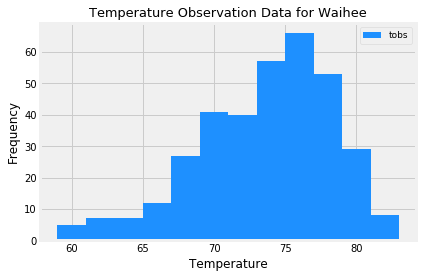

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
plt.hist(temps, bins=12, color='dodgerblue')
plt.rcParams.update({'font.size': 9})
plt.title("Temperature Observation Data for Waihee")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
labels = ['tobs']
plt.legend(labels)

plt.show()

#### Climate App
Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.

Start Date for trip: 2/10/17

End Date for trip: 2/20/17

In [31]:
# Flask Setup
app = Flask(__name__)

In [32]:
# Home page.
# List all routes that are available.
@app.route("/")
def welcome():
    """List all available api routes."""
    return (
        f"Available Routes:<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start> <br/>"
        f"/api/v1.0/<start>/<end> <br/>"
    )

In [33]:
# Convert the query results to a Dictionary using date as the key and prcp as the value.
# Return the JSON representation of your dictionary.
@app.route("/api/v1.0/precipitation")
def precipitation():
    """Returns precipitation for the last year of data in the database"""
    results = session.query(Measurement.date, Measurement.station, Measurement.prcp).\
    filter(Measurement.date > "2016-08-23").all()

    station_precip = []
    for Measurement.date, Measurement.station, Measurement.prcp in results:
        precip_dict = {}
        precip_dict["date"] = Measurement.date
        precip_dict["station"] = Measurement.station
        precip_dict["prcp"] = Measurement.prcp
        station_precip.append(precip_dict)
    
    return jsonify(station_precip)

In [34]:
# Return a JSON list of stations from the dataset.
@app.route("/api/v1.0/stations")
def stations():
    """Return a list of all stations"""
    # Query all stations
    station_list = session.query(Measurement.station).distinct()
    
    return jsonify([station[0] for station in station_list])

In [35]:
# Query for the dates and temperature observations from a year from the last data point.
# Return a JSON list of Temperature Observations (tobs) for the previous year.
@app.route("/api/v1.0/tobs")
def tobs():
    """Returns a list of Temperature Observations"""
    temp_obs = (session.query(Measurement.tobs).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').order_by(Measurement.tobs).all())
    
    return jsonify(temp_obs)

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
@app.route('/api/v1.0/<start>/<end>')
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2017-02-10', '2017-02-20'))

[(62.0, 71.40298507462687, 80.0)]


In [37]:
#Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax for your trip 
#using the previous year's data for those same date

year_ago2 = dt.date(2017, 2, 10) - dt.timedelta(days=365)
print(year_ago2)

2016-02-11


In [38]:
year_ago2 = dt.date(2017, 2, 20) - dt.timedelta(days=365)
print(year_ago2)

2016-02-21


In [39]:
# previous year = 2016-02-11 - 2016-02-21
print(calc_temps('2016-02-11', '2016-02-21'))

[(61.0, 71.71014492753623, 79.0)]


In [40]:
@app.route("/api/v1.0/<start>")
def calc_temps_start(start_dt):
    """TMIN, TAVG, and TMAX for all dates greater than and equal to the start date"""

start_dt = Measurement.date <= '2017-02-10'
return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_dt).all()

#print(calc_temps('2017-02-10'))

[(53.0, 73.09795396419437, 87.0)]

In [41]:
if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with stat


SystemExit: 1

/Users/katelynburke/anaconda3/envs/PythonData2/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
